In [1]:
from transformers import CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [2]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch16")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

  2026-01-18T15:24:40.884865Z  WARN  Reqwest(reqwest::Error { kind: Request, url: "https://transfer.xethub.hf.co/xorbs/default/49c728021e82f45824e49aded272e333e5f7ef05b875eeb25608bedc3b409684?X-Xet-Signed-Range=bytes%3D27996800-28660713&X-Xet-Session-Id=01KF8VA5DKTMJM6P75N171P0EE&Expires=1768753466&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly90cmFuc2Zlci54ZXRodWIuaGYuY28veG9yYnMvZGVmYXVsdC80OWM3MjgwMjFlODJmNDU4MjRlNDlhZGVkMjcyZTMzM2U1ZjdlZjA1Yjg3NWVlYjI1NjA4YmVkYzNiNDA5Njg0P1gtWGV0LVNpZ25lZC1SYW5nZT1ieXRlcyUzRDI3OTk2ODAwLTI4NjYwNzEzJlgtWGV0LVNlc3Npb24tSWQ9MDFLRjhWQTVES1RNSk02UDc1TjE3MVAwRUUiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3Njg3NTM0NjZ9fX1dfQ__&Signature=MEUCIQC7aqMPAUPx4161Nm32ZrmRa9ZFGREbQSyUb10ytyTocQIgW7eUp3cdDxCAL8TJ40ewqXOsoKeFHvUAtbG6StvmgIU_&Key-Pair-Id=K3TGA0E1JYVXF7", source: hyper_util::client::legacy::Error(Connect, Custom { kind: UnexpectedEof, error: "tls handshake eof" }) }). Retrying...
    at /private/var/folders/nz/j6p8yfhx1mv_0g

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
from PIL import Image
import requests
img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

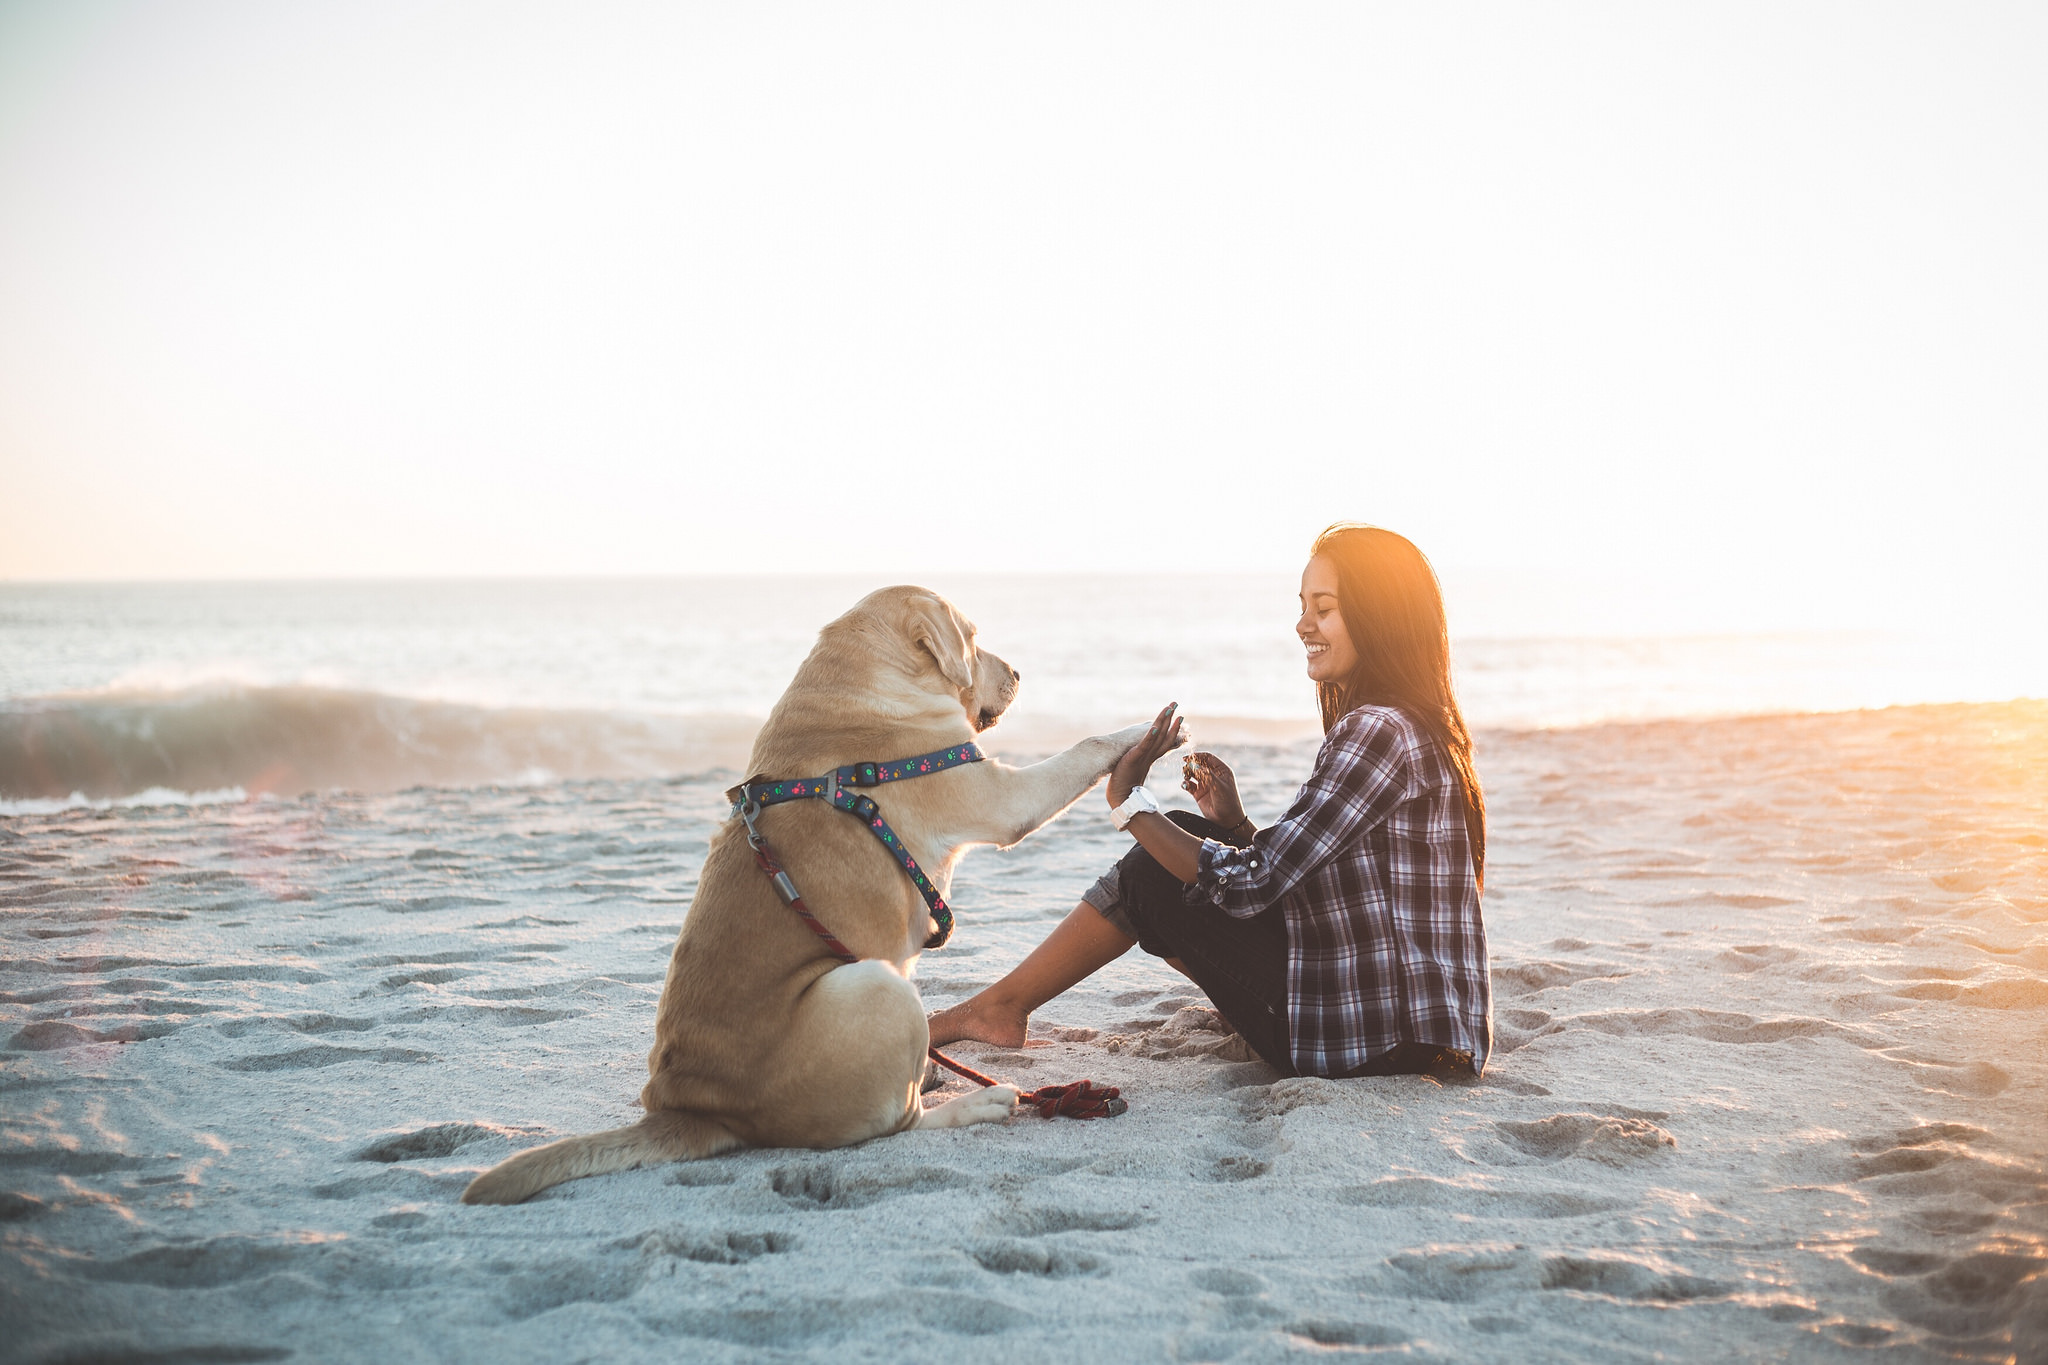

In [4]:
raw_image

In [5]:
labels = ["a photo of a cat", "a photo of a dog"]

In [6]:
inputs = processor(text = labels, 
                  images = raw_image,
                  return_tensors="pt",
                  padding=True)

In [7]:
outputs = model(**inputs)

In [8]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[21.1337, 27.2981]], grad_fn=<TBackward0>), logits_per_text=tensor([[21.1337],
        [27.2981]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0413, -0.0037,  0.0096,  ...,  0.0059, -0.0040,  0.0131],
        [ 0.0282, -0.0117,  0.0112,  ..., -0.0110,  0.0240,  0.0283]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-2.4312e-02, -1.5937e-01, -2.3610e-02,  1.7490e-02, -2.2960e-03,
         -1.4094e-02,  4.2172e-02,  4.8790e-02,  4.3820e-02, -2.7287e-03,
          1.3041e-02, -1.9836e-02,  3.6878e-02, -7.3056e-03, -4.9938e-02,
         -5.1388e-03, -1.7725e-02,  1.1446e-02, -1.4867e-02, -3.0385e-02,
         -1.3195e-02, -1.3216e-02,  4.1559e-03,  3.9900e-02, -1.0937e-02,
         -4.8553e-02, -9.8049e-03,  1.9370e-02,  2.6172e-02,  9.0478e-03,
         -1.7479e-02,  4.7612e-02, -2.9433e-02,  4.7095e-03, -4.2809e-02,
          3.9649e-03,  3.4057e-02, -1.4138e-02,  6.7458e-03, -1.8748e-02,
          1.3927e-02, -7.4891e-02, -5.5

In [9]:
outputs.logits_per_image

tensor([[21.1337, 27.2981]], grad_fn=<TBackward0>)

In [10]:
probs = outputs.logits_per_image.softmax(dim=1)[0]
probs

tensor([0.0021, 0.9979], grad_fn=<SelectBackward0>)

In [11]:
probs = list(probs)
for i in range(len(labels)):
    print(f"label:{labels[i]} - probalility of {probs[i].item():.4f}")

label:a photo of a cat - probalility of 0.0021
label:a photo of a dog - probalility of 0.9979
